In [3]:
import matplotlib.pyplot as plt         
from tabulate import tabulate           
import matplotlib as mat              
import seaborn as sns                 
import pandas as pd                       
import numpy as np     

In [4]:
df=pd.read_csv('data4.csv')

In [73]:
df

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,GENDER,Car,House,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_GOODS_PRICE,...,DAYS_EMPLOYED,MOBILE,WORK_PHONE,HOME_PHONE,MOBILE_REACHABLE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,APPLICATION_DAY,TOTAL_DOC_SUBMITTED
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,351000.0,...,-637,1,1,0,1,0,Laborers,1.0,WEDNESDAY,1
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,1129500.0,...,-1188,1,1,0,1,0,Core staff,2.0,MONDAY,1
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,135000.0,...,-225,1,1,1,1,0,Laborers,1.0,MONDAY,0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,297000.0,...,-3039,1,1,0,1,0,Laborers,2.0,WEDNESDAY,1
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,513000.0,...,-3038,1,1,0,1,0,Core staff,1.0,THURSDAY,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,216086,0,Cash loans,F,N,Y,1,157500.0,755190.0,675000.0,...,-232,1,1,1,1,0,Sales staff,3.0,MONDAY,1
99996,216087,0,Cash loans,F,N,Y,1,225000.0,284400.0,225000.0,...,-182,1,1,0,1,0,Managers,3.0,TUESDAY,1
99997,216088,0,Cash loans,F,Y,Y,0,135000.0,1262583.0,1102500.0,...,-4805,1,1,0,1,0,Sales staff,2.0,TUESDAY,1
99998,216089,0,Cash loans,F,Y,N,0,135000.0,225000.0,225000.0,...,-340,1,1,0,1,0,Sales staff,2.0,FRIDAY,2


## Let's take a look at the distribution of the credit in the bank.

In [27]:
t1=df[df['AMT_CREDIT']<(df['AMT_CREDIT'].quantile(0.75)+1.5*df['AMT_CREDIT'].std())]
t2=df[df['AMT_INCOME_TOTAL']<(df['AMT_INCOME_TOTAL'].quantile(0.75)+1.5*df['AMT_INCOME_TOTAL'].std())]

<AxesSubplot:xlabel='AMT_CREDIT', ylabel='Count'>

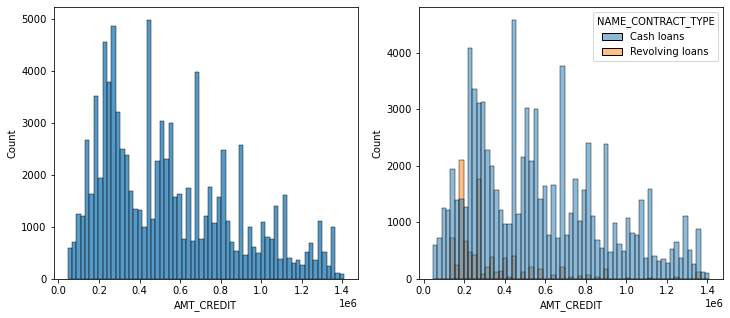

In [167]:
fig,ax=plt.subplots(1,2,figsize=(12,5))
sns.histplot(t1,x='AMT_CREDIT',ax=ax[0])
sns.histplot(t1,x='AMT_CREDIT',hue='NAME_CONTRACT_TYPE',ax=ax[1])

#### There is a concentration of people between 200,000 and 300,000. This tells us about the demographic of majority of the bank's borrowers.
#### For customers with revolving loans there is a concentration of people between 100,000 and 400,000.Since there are a large number of people with cash loans compared to those with revolving loans they seem to dominate the overall statistic.

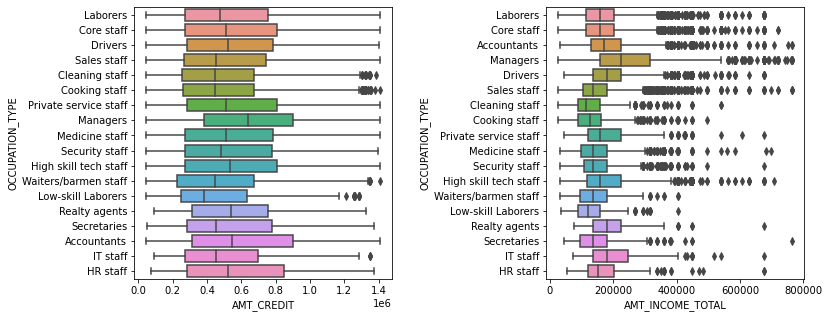

In [45]:
fig,ax=plt.subplots(1,2,figsize=(12,5))
sns.boxplot(data=t1,y='OCCUPATION_TYPE',x='AMT_CREDIT',ax=ax[0])
sns.boxplot(data=t2,y='OCCUPATION_TYPE',x='AMT_INCOME_TOTAL',ax=ax[1])
plt.subplots_adjust(wspace=0.6)

## An analysis on whether having a house or car affects people missing a payment.

In [124]:
t12=t1[t1['AMT_INCOME_TOTAL']<(t1['AMT_INCOME_TOTAL'].quantile(0.75)+1.5*t1['AMT_INCOME_TOTAL'].std())]
t123=t1[t1['AMT_INCOME_TOTAL'].between((t1['AMT_INCOME_TOTAL'].quantile(0.25)-1.5*t1['AMT_INCOME_TOTAL'].std()),(t1['AMT_INCOME_TOTAL'].quantile(0.75)+1.5*t1['AMT_INCOME_TOTAL'].std()))]

##### Target variable (1 - client with payment difficulties: he/she had late payment more than X days on at least one of the first Y installments of the loan in our sample, 0 - all other cases)

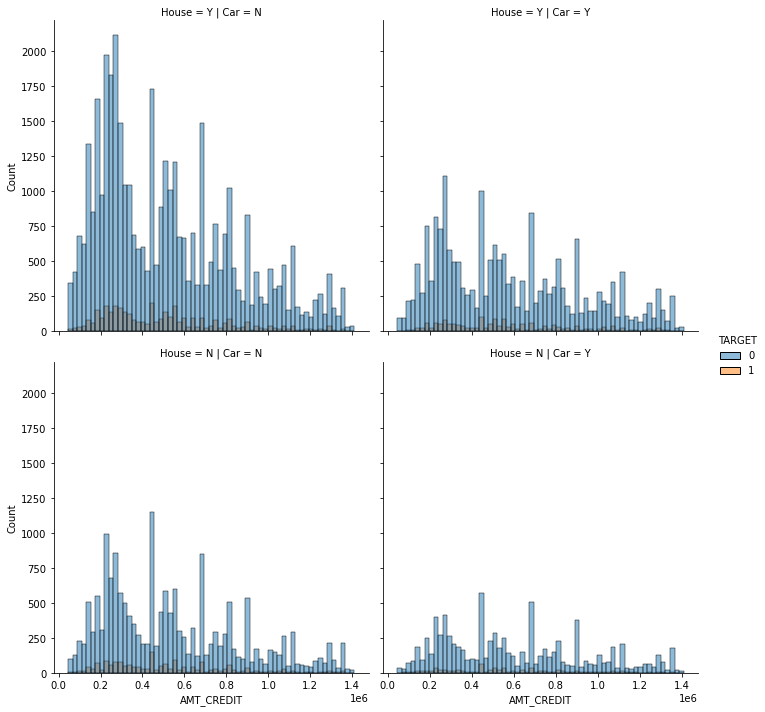

In [56]:
sns.displot(data=t12,x='AMT_CREDIT',hue='TARGET',row='House',col='Car')

#### There are a large number of people who have missed a payment across the range of credit amount in people who have a house and no car,people who have no house and no car fared marginally better. Number of people with both a house and a car who have never missed a payment are very slightly lower in number than the former.The least number of people who never missed a payment have a car but no house.

## Looking for gender discrimination in loan amount granted.

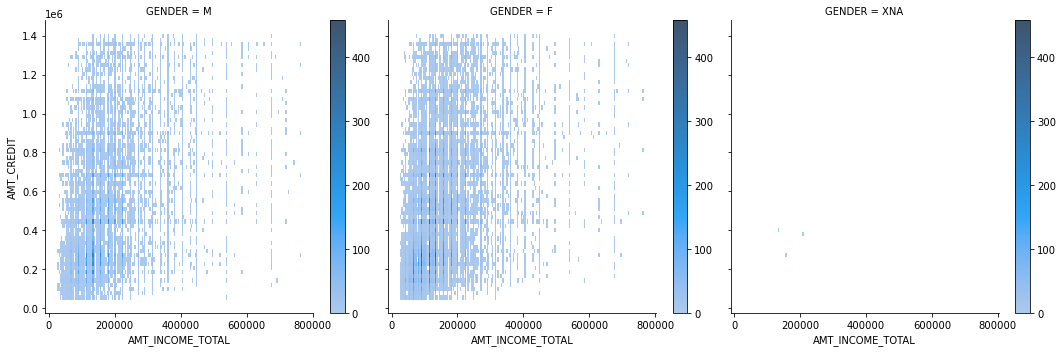

In [174]:
sns.displot(t12,x='AMT_INCOME_TOTAL',y='AMT_CREDIT',col='GENDER',cbar=True)

#### For a low income amount females who were granted a higher minimum loan amount.There seem to be negligible difference in other areas.Therefore it can be said that the bank does not discriminate customers based on gender.

## An analysis on people with income between 50,000 and 400,000 and their tendency to miss a payment deadline.

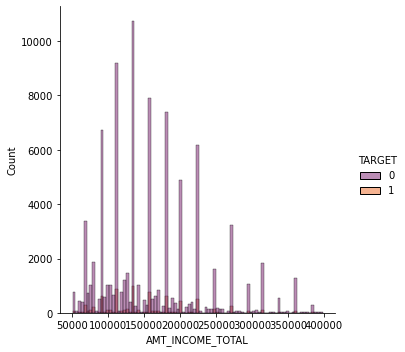

In [63]:
sns.displot(t2[t2['AMT_INCOME_TOTAL'].between(50000,400000)],x='AMT_INCOME_TOTAL',hue='TARGET',palette='inferno')

#### We can see that the people who have never missed a payment deadline follow a normal distribution whereas people who missed a payment barely constituite a normal distribution and are much lesser in number than those who paid in a timely manner.

## Developing a credit score system 

In [149]:
t123['CREDIT_SCORE']=round(((abs(t123['DAYS_EMPLOYED']))**0.5)+(-(t123['TARGET']*100)+(-(t123['CNT_CHILDREN'])*10)+(t123['AMT_INCOME_TOTAL']/1000)+(t123['AMT_INCOME_TOTAL']/t123['AMT_CREDIT']*1000)+(t123['AMT_GOODS_PRICE']/t123['AMT_CREDIT']*1000)+(t123['MOBILE']*10)+(t123['WORK_PHONE']*10)+(t123['HOME_PHONE']*10)+(t123['MOBILE_REACHABLE']*50)+(t123['FLAG_EMAIL']*10)-(t123['CNT_FAM_MEMBERS']*100)+(t123['TOTAL_DOC_SUBMITTED']*50)))
# The credit score is calculated by normalising a lot of values that have been asssumed to affect the repayment ability of
# the customer and while summing the attributes a positive or negative of the normalised value is taken for the credit score
# Individals with a higher credit score should be considered to have higher repayment power.
# days employed - a sqaure root of the number is taken to normalise it since it represents a stable job it is considered as
#                 positive attribute.
# TARGET - Since people with no missed payment have a value of zero they don't recive a subtraction of 100 in their credit 
#          score.
# Count children - Since children put some stress on financial resources, for every child a score of 10 is subtracted
# AMT_INCOME_TOTAL - The total income amount is considered a positive attribute and is normalised by dividing with 1000
# AMT_INCOME_TOTAL/AMT_CREDIT - The ratio of income to credit represents how much(lack) of a financial burden the loan is
#                               for them.It is normalised by multiplying the ratio with 1000
# AMT_GOODS_PRICE/AMT_CREDIT - This ratio represents how much has already been paid for the item and a high value in this 
#                              indicates the customer paid a significant cost of the product with their savings and the  
#                              value of the ratio multiplied by 1000 is added as a positive attribute.
# MOBILE - Having contact information of a customer is a positive attribute at increases the credit score by 10
# WORK_PHONE - Having contact information of a customer is a positive attribute at increases the credit score by 10
# HOME_PHONE - Having contact information of a customer is a positive attribute at increases the credit score by 10
# MOBILE_REACHABLE - Being able to contact a customer is a positive attribute at increases the credit score by 50
# FLAG_EMAIL - Having contact information of a customer is a positive attribute at increases the credit score by 10
# CNT_FAM_MEMBERS - Since family members add some stress on financially,for every family members a score of 10 is subtracted
# TOTAL_DOC_SUBMITTED - For every document submitted a score of 50 is added.
 

C:\Users\saiki\AppData\Local\Temp\ipykernel_10212\531846338.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  t123['CREDIT_SCORE']=round(((abs(t123['DAYS_EMPLOYED']))**0.5)+(-(t123['TARGET']*100)+(-(t123['CNT_CHILDREN'])*10)+(t123['AMT_INCOME_TOTAL']/1000)+(t123['AMT_INCOME_TOTAL']/t123['AMT_CREDIT']*1000)+(t123['AMT_GOODS_PRICE']/t123['AMT_CREDIT']*1000)+(t123['MOBILE']*10)+(t123['WORK_PHONE']*10)+(t123['HOME_PHONE']*10)+(t123['MOBILE_REACHABLE']*50)+(t123['FLAG_EMAIL']*10)-(t123['CNT_FAM_MEMBERS']*100)+(t123['TOTAL_DOC_SUBMITTED']*50)))


In [150]:
t123

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,GENDER,Car,House,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_GOODS_PRICE,...,MOBILE,WORK_PHONE,HOME_PHONE,MOBILE_REACHABLE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,APPLICATION_DAY,TOTAL_DOC_SUBMITTED,CREDIT_SCORE
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,351000.0,...,1,1,0,1,0,Laborers,1.0,WEDNESDAY,1,1509.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,1129500.0,...,1,1,0,1,0,Core staff,2.0,MONDAY,1,1306.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,135000.0,...,1,1,1,1,0,Laborers,1.0,MONDAY,0,1562.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,297000.0,...,1,1,0,1,0,Laborers,2.0,WEDNESDAY,1,1492.0
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,513000.0,...,1,1,0,1,0,Core staff,1.0,THURSDAY,1,1433.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,216086,0,Cash loans,F,N,Y,1,157500.0,755190.0,675000.0,...,1,1,1,1,0,Sales staff,3.0,MONDAY,1,1095.0
99996,216087,0,Cash loans,F,N,Y,1,225000.0,284400.0,225000.0,...,1,1,0,1,0,Managers,3.0,TUESDAY,1,1631.0
99997,216088,0,Cash loans,F,Y,Y,0,135000.0,1262583.0,1102500.0,...,1,1,0,1,0,Sales staff,2.0,TUESDAY,1,1104.0
99998,216089,0,Cash loans,F,Y,N,0,135000.0,225000.0,225000.0,...,1,1,0,1,0,Sales staff,2.0,FRIDAY,2,1723.0


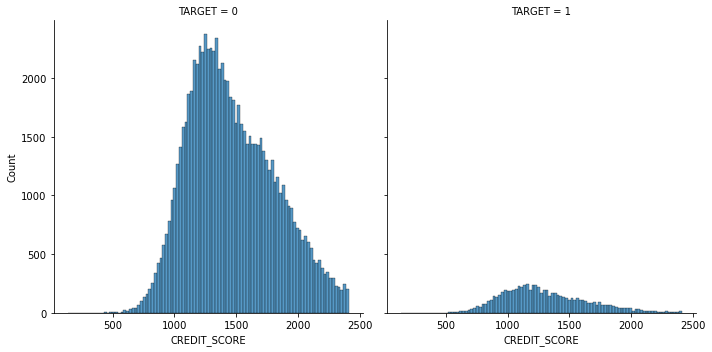

In [151]:
t1234=t123[t123['CREDIT_SCORE']<(t123['CREDIT_SCORE'].quantile(0.75)+1.5*t123['CREDIT_SCORE'].std())]
sns.displot(t1234,x='CREDIT_SCORE',col='TARGET')

Credit score seems to follow normal distribution among people who never missed a payment deadline and close to normal distribution among people who did.

In [152]:
t1234[t1234['TARGET']==0]['CREDIT_SCORE'].mean()
t1234[t1234['TARGET']==1]['CREDIT_SCORE'].mean()
print('The average credit score for people who never missed a payment is',t1234[t1234['TARGET']==0]['CREDIT_SCORE'].mean(),'and for those who had atleast one delayed  payment is',t1234[t1234['TARGET']==1]['CREDIT_SCORE'].mean())

The average credit score for people who never missed a payment is 1467.4728672985782 and for those who had atleast one delayed  payment is 1298.104544869319


#### A large population of people who never missed a payment deadline are situated close to or above the mean whereas for the population of those who missed a payment deadline are more widely distributed across the credit score.

## A look into how credit score varies with number of days employed.

In [153]:
tno=t1234
tno['DAYS_EMPLOYED']=abs(tno['DAYS_EMPLOYED'])

C:\Users\saiki\AppData\Local\Temp\ipykernel_10212\1982864902.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tno['DAYS_EMPLOYED']=abs(tno['DAYS_EMPLOYED'])


In [154]:
tno=tno[tno['DAYS_EMPLOYED']<(tno['DAYS_EMPLOYED'].quantile(0.75)+1.5*tno['DAYS_EMPLOYED'].std())]

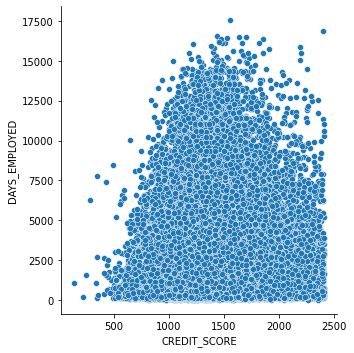

In [155]:
sns.relplot(data=tno,x='CREDIT_SCORE',y='DAYS_EMPLOYED')

#### We can see that people who have spent a long time in their job have exist in a much narrower band of credit score , whereas people who don't work have a credit score that starts very low and goes high with a lot of people distributed roughly uniformly across the range.

## A look at the bank's distribution of loan amounts based on income and credit score.

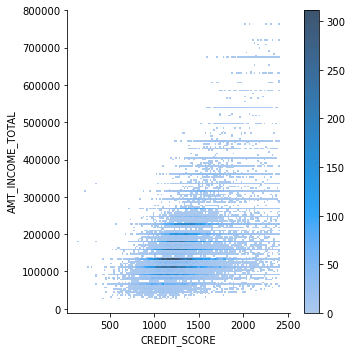

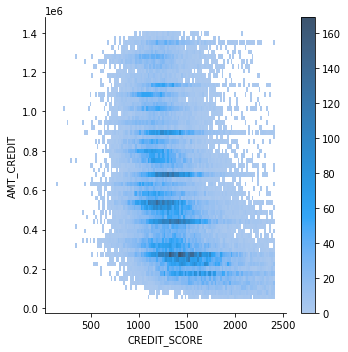

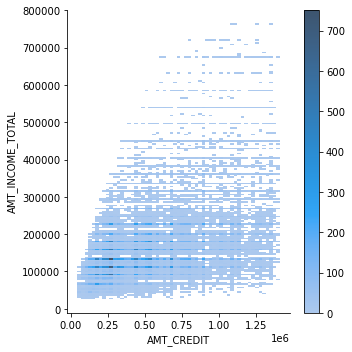

In [161]:
sns.displot(tno,x='CREDIT_SCORE',y='AMT_INCOME_TOTAL',cbar=True,ax=ax[0])
sns.displot(tno,x='CREDIT_SCORE',y='AMT_CREDIT',cbar=True,ax=ax[0])
sns.displot(tno,x='AMT_CREDIT',y='AMT_INCOME_TOTAL',cbar=True)

#### If we break up credit amount into different levels considering them as people from different income classes we can see that a lot of people have been awarded loans in various income levels between a credit score of 1200 and 1600. In very low income levels there are very few people who have been granted a loan greater than 700,000 and as we climb the income ladder we can see that the minimum loan amount increases and as the loan amount increases the minimum total income increases.There are a less number of people with high income who took a loan and those loan amounts are situated on the higher side(close to a million and more).The credit score for people with small loans is lower in range and has a higher minimum value than people with mid-level or high income, the bank doesn't seem to take much risk with low income indivisuals and seems to favour indivisuals with higher income when granting loans.The bank seems to be playing safe with large loan amounts even for people high income as there as less number of loans even though the income and credit score of high income indivuals are high.

## A look at how occupation type affects credit score

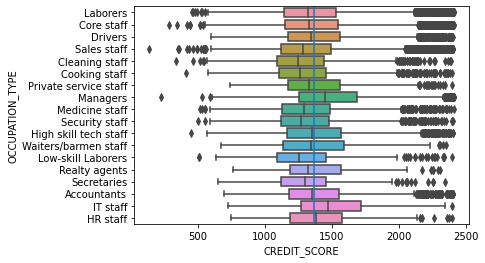

In [169]:
sns.boxplot(data=tno,x='CREDIT_SCORE',y='OCCUPATION_TYPE')
plt.axvline(x=tno.CREDIT_SCORE.mean())

#### There are no lower outliers for Drivers,Private Service Staff,Waiters/barmen staff,Realty agents,Secrataries,Accountants,IT staff and HR staff among whom most of them  have a mean credit score slightly below the overall mean credit score or higher than the overall mean credit score.IT staff and managers have a large number of people with a high credit score above the average credit score and the average credit score for people working in these professions is also higher than the population average credit score.

# Recommendations

### The bank can take slightly higher risk by granting more loans of higher amounts for high income customers who have a higher credit score.

### The bank should grant more loans and slightly higher credit amounts to people who spent a long time in their jobs and/or to those with stable income.

### The bank can grant look at profession average credit score and population average credit score before making a descion on a new loan.